# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Elsa Ghirmazion
### https://github.com/elsagis/wmnlp-materials-web-scraping


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Q1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests
response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-wOrk')


#print(response.status_code)
#print(response.headers['content-type'])
# uncomment next line to print the full HTML text; it's long so when done, recomment
#print(response.text)
article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-wOrk')
article_html = article_page.text

import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

# Q2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [7]:
from bs4 import BeautifulSoup

# parser = 'html5lib'
parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)
# Uncomment next lines to explore full page contents; it's long so when done, recomment
# print(soup)
# print(soup.prettify())

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-wOrk')
article_html = article_page.text

import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)
    
soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')
#print(article_element)
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

# Q3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
# adding sentiment analysis
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)
#print(non_ws_tokens)
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
print(interesting_tokens)

from collections import Counter
word_freq = Counter(map(str, interesting_tokens))
#print(word_freq.most_common(5))
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

print(lemma_freq.most_common(5))

[Laser, Headlights, Work, 130, Comments, Lewin, Day, March, 22, 2021, think, onward, march, automotive, technology, headlights, usually, thing, come, mind, Engines, fuel, efficiency, switch, electric, power, mind, mean, thousands, engineers, world, working, improve, state, art, automotive, lighting, day, day, Sealed, beam, headlights, gave, way, modern, designs, regulations, loosened, bulbs, moved, simple, halogens, xenon, HIDs, recently, LEDs, new, technology, scene, lasers, Laser, Headlights, BWM, prototype, laser, headlight, assemblies, undergoing, testing, image, brought, mind, phrase, laser, headlights, laser, beams, firing, automobile, Obviously, coherent, beams, monochromatic, light, poor, illumination, outside, specific, spot, distance, away, Thankfully, eyes, laser, headlights, work, way, Instead, laser, headlights, consist, solid, state, laser, diodes, mounted, inside, headlight, blue, lasers, fired, yellow, phosphor, similar, white, LEDs, produces, powerful, vibrant, white, 

# Q4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
import requests
response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-wOrk')

from bs4 import BeautifulSoup
article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-wOrk')
article_html = article_page.text

import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)
    
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
# adding sentiment analysis
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)
#print(non_ws_tokens)
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
#print(interesting_tokens)

from collections import Counter
word_freq = Counter(map(str, interesting_tokens))
#print(word_freq.most_common(5))
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

#print(lemma_freq.most_common(5))

interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

# lets store the 5 most common words in a set
cool_words = set()
for lemma, freq in lemma_freq.most_common(5):
    cool_words.add(lemma)
#print(cool_words)
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))

[('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


# Q5

# I have tried to check my function working in many ways, i can see the list count printed 

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [8]:
sentences = list(doc.sents)  # Thanks spacy for just giving us our sentences
for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in cool_words:
            count += 1
    sent_str = str(sentence).replace('\n', '').replace('  ','  ')
    print(count, ':', sent_str)


1 : How Laser Headlights Work                130 Comments            by:Lewin DayMarch 22, 2021
2 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
3 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
2 : Now, a new technology is on the scene, with lasers!
1 : Laser Headlights?!
2 : BWM’s prototype laser headlight assemblies undergoing testing.
4 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
1 : Obviously, coherent beams of monochromatic light would make for poor ill

In [9]:
top_tokens = ['laser', 'headlights', 'technology', 'headlight', 'led']
sentences = list(doc.sents)

def wordCount(sentence):
    for count in sentences:
        count = 0
        for token in sentence:
            if not (token.is_space or token.is_punct):
                count += 1
    sent_str = str(sentence).replace('\n', ' ').replace(' ', ' ')
    return count
print(wordCount(sentences[2]))
print(sentences[2])

def score_sentence_by_token(sentence, interesting_token):
    for sentence in sentences:
        count1 = 0
        for top_token in sentences:
            if top_token in sentences:
                count1 += 1
total = wordCount(sentence)
print('output: score_sentence_by_token: ',count, '/', total, count/total)
               
   
  

15
Engines, fuel efficiency, and the switch to electric power are all more front of mind.
output: score_sentence_by_token:  6 / 15 0.4


## Experiment

In [9]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

top_tokens = ['laser', 'headlights', 'technology', 'headlight', 'led']
top_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']


nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')
top_tokens = ['laser', 'headlights', 'technology', 'headlight', 'led']
text = "top_tokens" 
doc = nlp(text)
print(doc._.polarity)

0.0


In [10]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')
top_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']
text = "top_lemmas" 
doc = nlp(text)
print(doc._.polarity)

0.0


In [ ]:
import nltk
nltk.download(["averaged_perceptron_tagger", "punkt", "vader_lexicon"])

In [11]:
top_tokens = ['laser', 'headlights', 'technology', 'headlight', 'led']
top_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']

def wordCount(sentence):          
    count = 0                                       # initialize a count to zero
    for token in sentence:                          # for token in sentence:
        if not (token.is_space or token.is_punct):  # if not (token.is_space or token.is_punct):
            count += 1                              # increment the count
    return count                                    # at the end return the count
print(wordCount(sentences[0]), sentences[0])

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
top_tokens = wordCount
text = "top_lemmas" 
scores = sia.polarity_scores(text)
print(scores)


12 

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021









{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


# Q6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [10]:
sentences = list(doc.sents)  # Thanks spacy for just giving us our sentences
for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in cool_words:
            count += 1
    sent_str = str(sentence).replace('\n', '').replace('  ','  ')
print(count, ':', sent_str)
    
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
top_lemmas = "count"
text = "top_lemmas" 
scores = sia.polarity_scores(text)
print(scores) 

6 : Posted in car hacks, Engineering, Featured, Laser Hacks, SliderTagged laser, laser headlight, laser headlights, light 
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [13]:


from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
text = "('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)"
scores = sia.polarity_scores(text)
print(scores)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Thegraph

15
Engines, fuel efficiency, and the switch to electric power are all more front of mind.


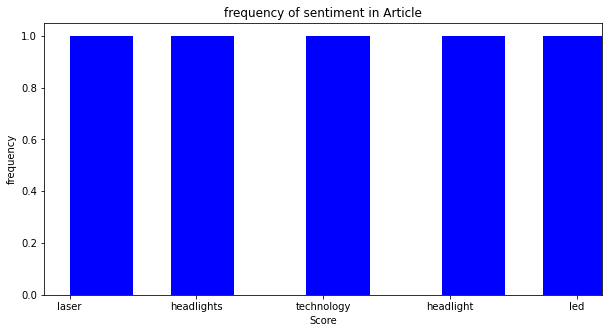

In [12]:
top_token = ['laser', 'headlights', 'technology', 'headlight', 'led']
sentences = list(doc.sents)

def wordCount(sentence):
    for count in sentences:
        count = 0
        for token in sentence:
            if not (token.is_space or token.is_punct):
                count += 1
    sent_str = str(sentence).replace('\n', ' ').replace(' ', ' ')
    return count
print(wordCount(sentences[2]))
print(sentences[2])

def score_sentence_by_token(sentence, interesting_token):
    for sentence in sentences:
        count1 = 0
        for top_token in sentences:
            if top_token in sentences:
                count1 += 1
total = wordCount(sentence)
score = total

import matplotlib.pyplot as plt
score = score
frequency = list(top_token)
fig = plt.figure(figsize = (10,5))
plt.hist(frequency, score, color='blue', width = 0.5)
plt.xlabel('Score')
plt.ylabel('frequency')
plt.title('frequency of sentiment in Article')
plt.show()


# Q7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

15
Engines, fuel efficiency, and the switch to electric power are all more front of mind.


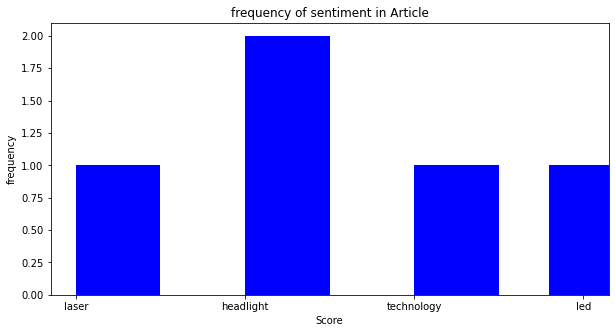

In [17]:
top_lemmas = ['laser', 'headlight', 'technology', 'headlight', 'led']
sentences = list(doc.sents)

def wordCount(sentence):
    for count in sentences:
        count = 0
        for token in sentence:
            if not (token.is_space or token.is_punct):
                count += 1
    sent_str = str(sentence).replace('\n', ' ').replace(' ', ' ')
    return count
print(wordCount(sentences[2]))
print(sentences[2])

def score_sentence_by_lemmas(sentence, interesting_token):
    for sentence in sentences:
        count1 = 0
        for top_token in sentences:
            if top_lemmas in sentences:
                count1 += 1
total = wordCount(sentence)
score = total
import matplotlib.pyplot as plt
import numpy as np
score = score
frequency = list(top_lemmas)
fig = plt.figure(figsize = (10,5))
plt.hist(frequency, score, color='blue', width = 0.5)
plt.xlabel('Score')
plt.ylabel('frequency')
plt.title('frequency of sentiment in Article')
plt.show()

# Q8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

# This will give us all words
from collections import Counter
word_freq = Counter(map(str, interesting_tokens))
print(word_freq.most_common())
 but by applying nouns= set()
 words like headlights would be ommited.